<h1> 1. Business Problem </h1>

To Identify whether the customer will close his/her account with the bank or will continue as a customer in the Bank.<br>

<h3>Source</h3>

https://www.kaggle.com/akdagmelih/classification-model-comparison-banks-customers<br>

<h4> Real world/Business Objectives and Constraints </h4>

1.No strict latency concerns.<br>
2.Interpretability is important.<br>

<h1>2. Machine Learning Problem </h1>

<h3>Data</h3>

*Data will be in a file Churn_Modelling.csv<br>
*Churn_Modelling.csv contains 14 columns<br>
*Number of rows in Churn_Modelling.csv is 10000 <br>

<h3>Columns Definition </h4>

*CustomerId - Unique Ids for bank customer identification <br>
*Surname    - Customer's last name<br>
*CreditScore - Credit score of the customer<br>
*Geography- The country from which the customer belongs<br>
*Gender - Male or Female<br>
*Age - Age of the customer<br>
*Tenure - Number of years for which the customer has been with the bank<br>
*Balance - Bank balance of the customer<br>
*NumOfProducts - Number of bank products the customer is utilising<br>
*HasCrCard- Binary Flag for whether the customer holds a credit card with the bank or not<br>
*IsActiveMember - Binary Flag for whether the customer is an active member with the bank or not<br>
*EstimatedSalary - Estimated salary of the customer in Dollars<br>
*Exited (target feature) - Binary flag 1 if the customer closed account with bank and 0 if the customer is retained<br>

<h3> Example Data point </h3>

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited<br>
17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1<br>


By seeing the data points we are having only categorical and numerical features only.<br>

<h1>Mapping the real world problem to an ML problem </h1>

<h3>Type of Machine Leaning Problem </h3>

It is a binary classification problem, for a given customer information we need to predict whether the user will leave the bank or not

<h3>Vectorizing</h3>
1.One-hot Encoding<br>
2.Response Coding

<h3>Performance Metric</h3>



*Confusion Matrix<br>
*Precision and recall<br>
<b>*Micro F1-Score </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<h3>Train and Test Construction </h3>

We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

<h1>Exploratory Data Analysis </h1>

In [377]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [378]:
df = pd.read_csv("Churn_Modelling.csv")

print("Number of data points:",df.shape[0])

Number of data points: 10000


In [379]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [381]:
#Duplicate check and dropping
df.drop_duplicates()
print(len(df))

10000


In [382]:
#Null/Nan check 
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [383]:
Counter(df['Exited'].values)

Counter({1: 2037, 0: 7963})

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h3>Exploratory Data Analysis</h3>

<AxesSubplot:xlabel='Exited'>

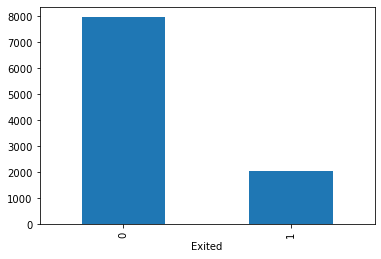

In [385]:
df.groupby("Exited")['CustomerId'].count().plot.bar()

In [386]:
#Dropping the useless columns for the analysis and modelling
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [387]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<h3>Observations</h3>
1.We can say that dataset is not much affected by outliers.<br>

<AxesSubplot:>

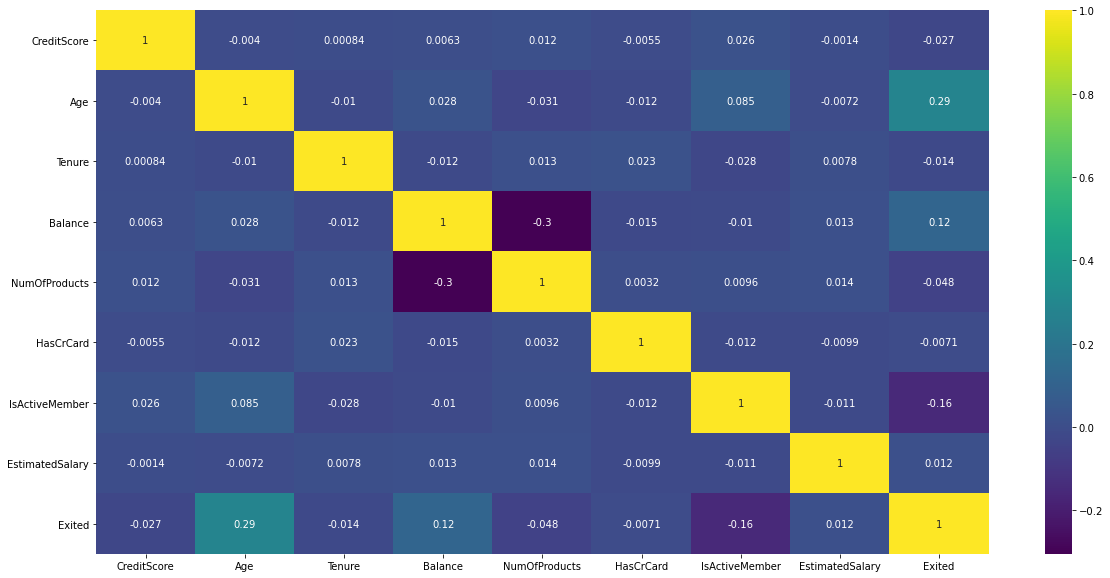

In [388]:
#Correlation check 
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

<h4> Observations </h4>
1.There is no high correlation between the features.<br>
2.By seeing the Age,Balance it may be useful feature as it has some high correlation with target class compared with other features.


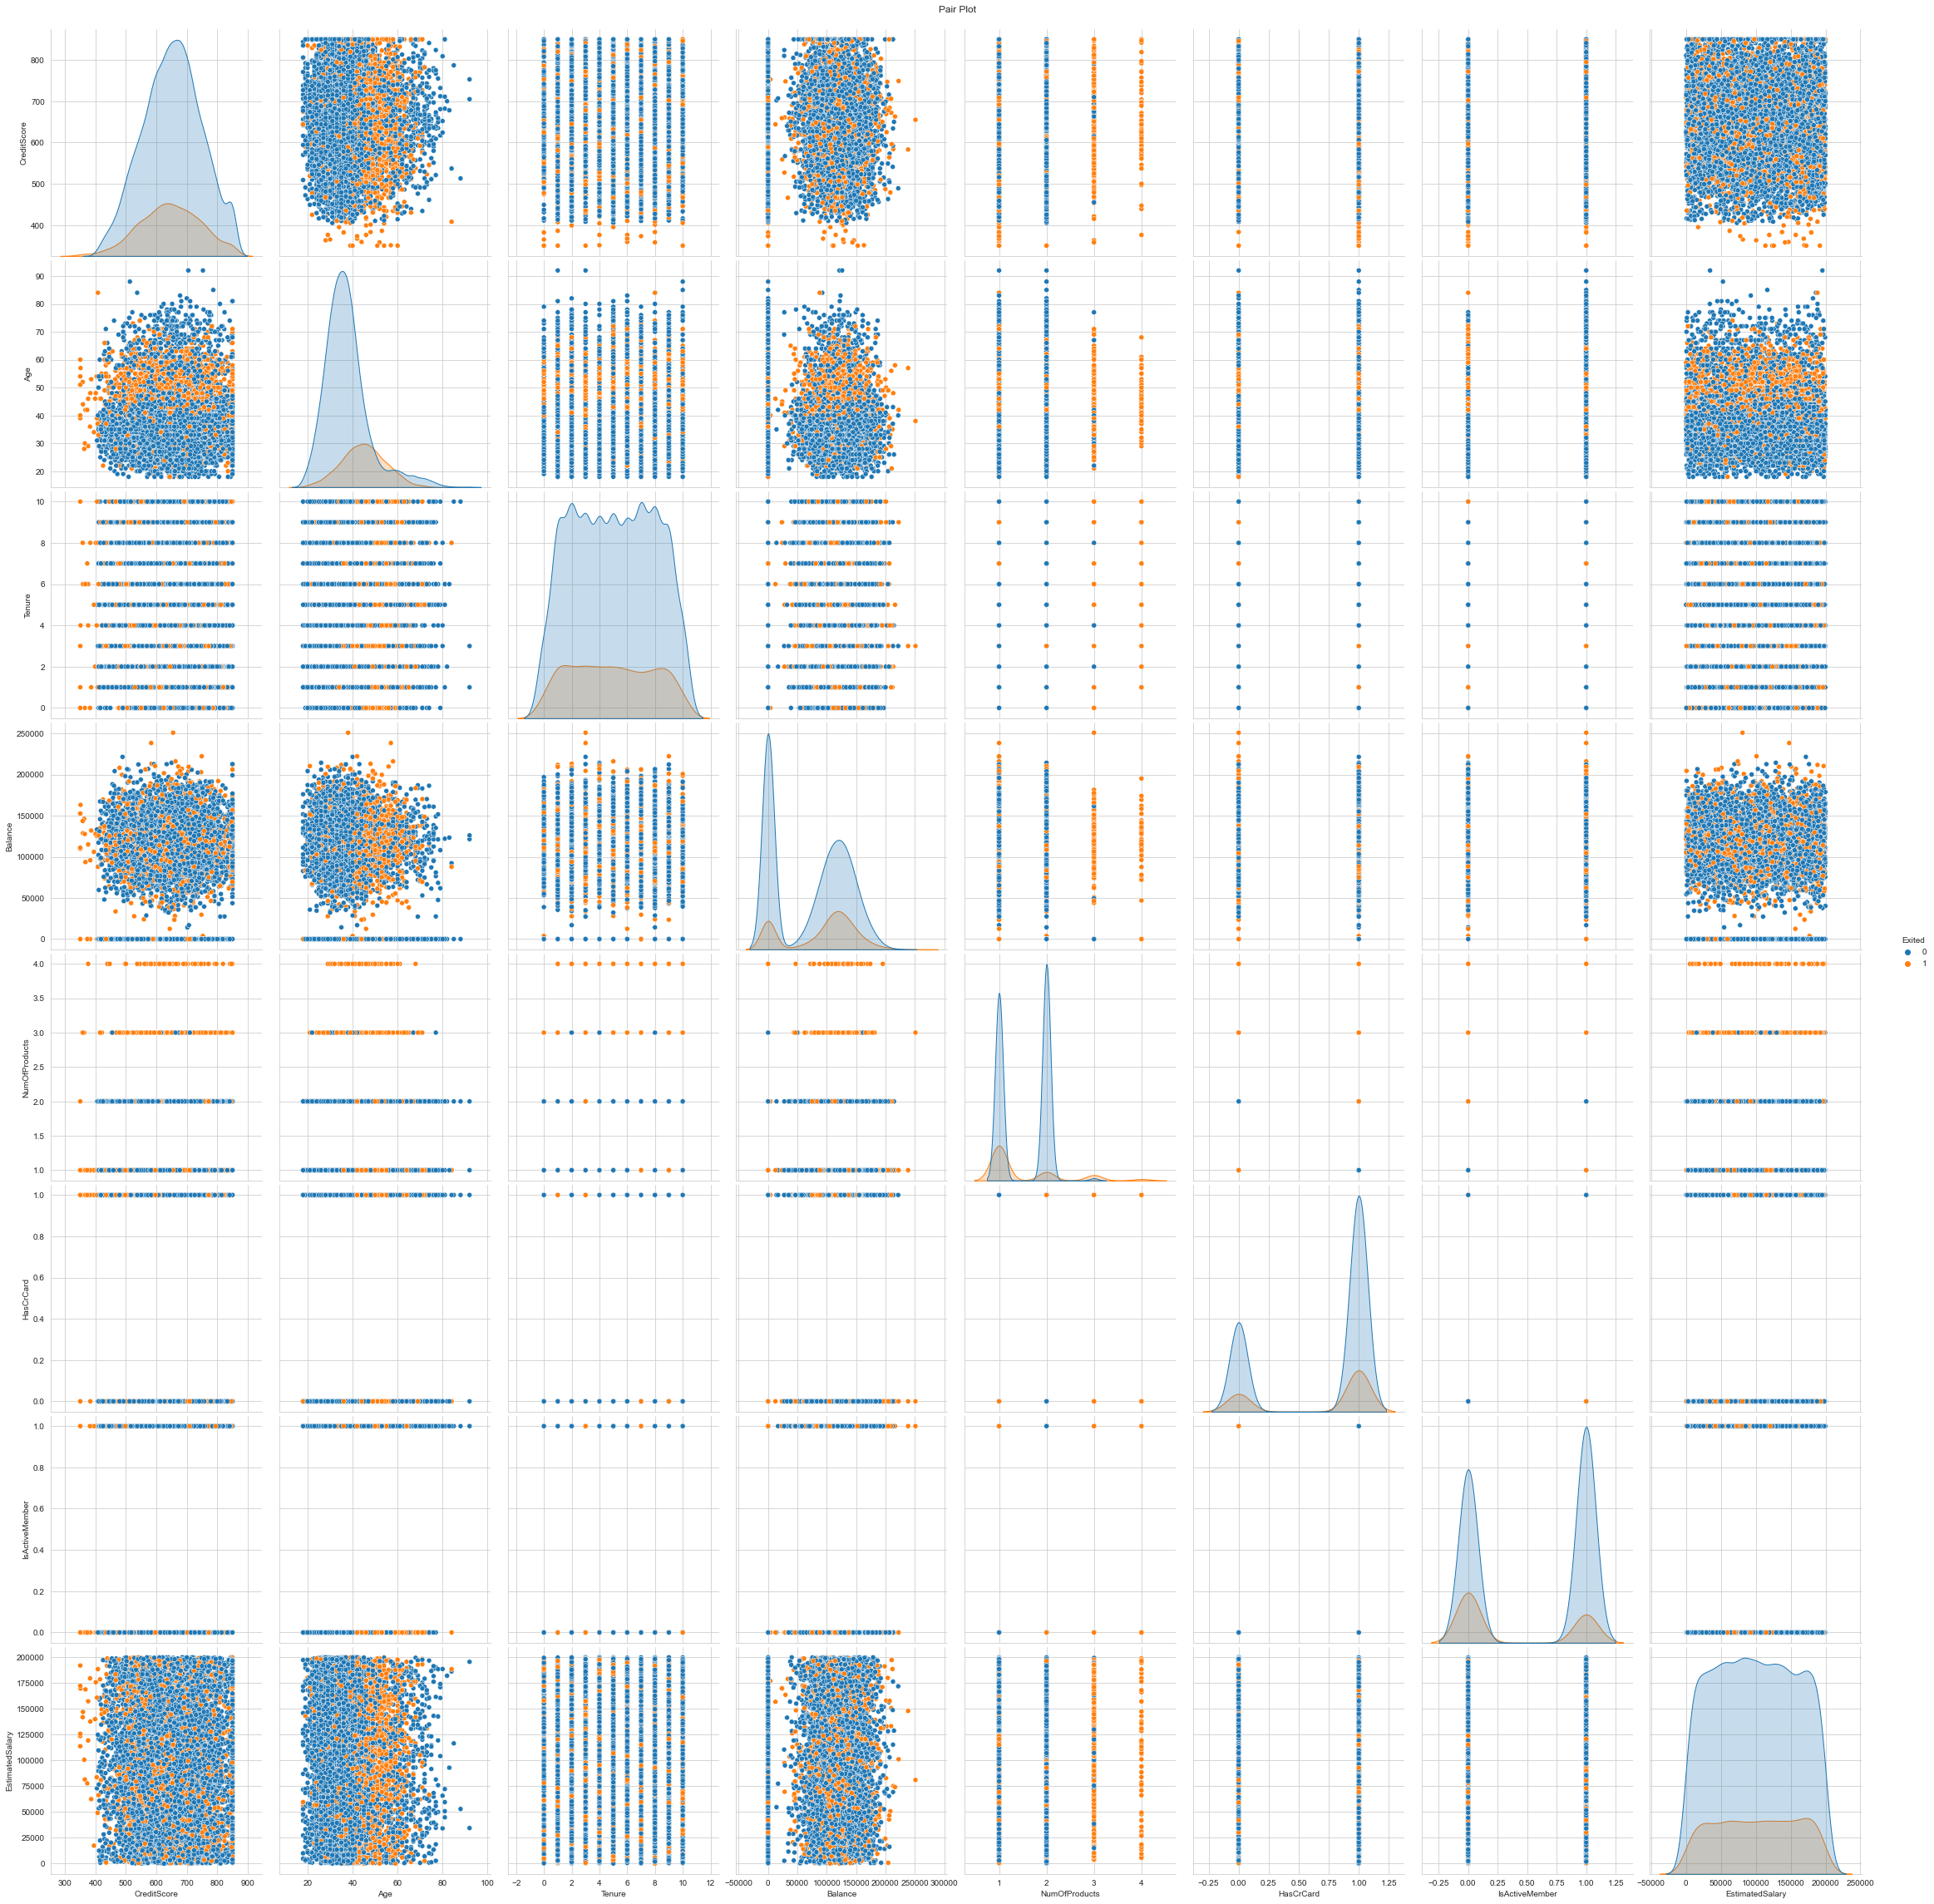

In [389]:
sns.set_style("whitegrid")
g=sns.pairplot(df, hue="Exited",diag_kind="kde",size=4)
g.fig.suptitle("Pair Plot",y=1)
plt.show()

<h3>Observation</h3>
1.We can see the huge overlap between two classes.<br>
2.It may not work in linear models.<br>

<h3>Univariate Analysis</h3>


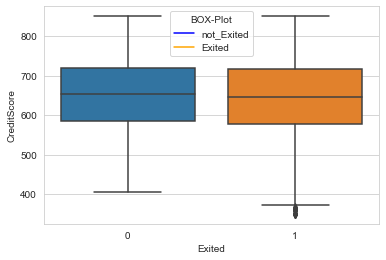

In [390]:
#CreditScore  
sns.boxplot(x='Exited',y='CreditScore', data=df)
#loc=9 upper center
plt.legend(["not_Exited","Exited"],title="BOX-Plot",loc=9)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('orange')
plt.show()

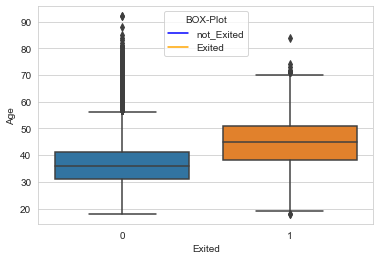

In [391]:
sns.boxplot(x='Exited',y='Age', data=df)
#loc=9 upper center
plt.legend(["not_Exited","Exited"],title="BOX-Plot",loc=9)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('orange')
plt.show()

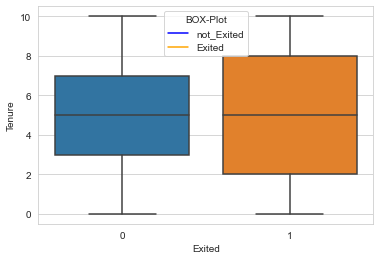

In [392]:
sns.boxplot(x='Exited',y='Tenure', data=df)
#loc=9 upper center
plt.legend(["not_Exited","Exited"],title="BOX-Plot",loc=9)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('orange')
plt.show()

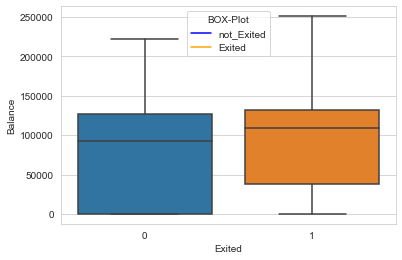

In [393]:
sns.boxplot(x='Exited',y='Balance', data=df)
#loc=9 upper center
plt.legend(["not_Exited","Exited"],title="BOX-Plot",loc=9)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('orange')
plt.show()

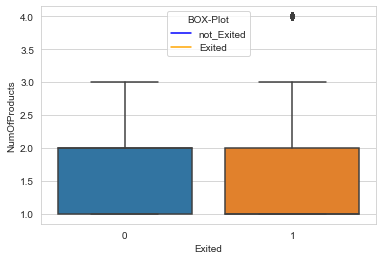

In [394]:
sns.boxplot(x='Exited',y='NumOfProducts', data=df)
#loc=9 upper center
plt.legend(["not_Exited","Exited"],title="BOX-Plot",loc=9)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('orange')
plt.show()

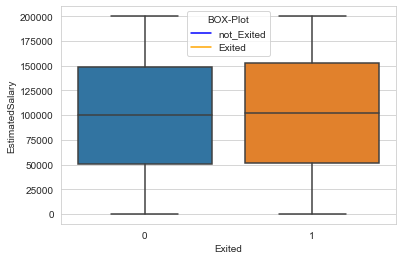

In [395]:

sns.boxplot(x='Exited',y='EstimatedSalary', data=df)
#loc=9 upper center
plt.legend(["not_Exited","Exited"],title="BOX-Plot",loc=9)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('orange')
plt.show()

In [396]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
labels=['Male','Female']
exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['Gender'].iloc[i]=='Male']),len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['Gender'].iloc[i]=='Female'])] 
not_exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['Gender'].iloc[i]=='Male']),len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['Gender'].iloc[i]=='Female'])] 
width = 0.35
print(exited)
print(not_exited)

[898, 1139]
[4559, 3404]


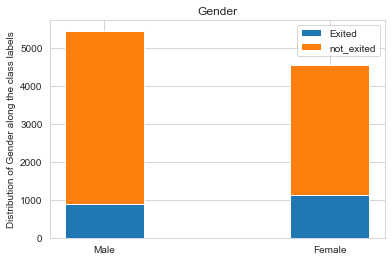

In [397]:
fig, ax = plt.subplots()


ax.bar(labels, exited, width,label='Exited' )
ax.bar(labels, not_exited, width,bottom=exited,
       label='not_exited')

ax.set_ylabel('Distribution of Gender along the class labels')
ax.set_title('Gender')
ax.legend()

plt.show()

In [398]:
labels=list(set(df['Geography'].values))
print(labels)
exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['Geography'].iloc[i]=='France']),len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['Geography'].iloc[i]=='Germany']),len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['Geography'].iloc[i]=='Spain'])] 
not_exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['Geography'].iloc[i]=='France']),len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['Geography'].iloc[i]=='Germany']),len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['Geography'].iloc[i]=='Spain'])] 
width = 0.35
print(exited)
print(not_exited)

['Spain', 'Germany', 'France']
[810, 814, 413]
[4204, 1695, 2064]


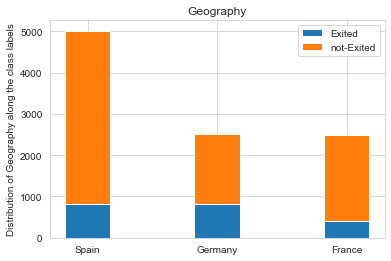

In [399]:
fig, ax = plt.subplots()


ax.bar(labels, exited, width,label='Exited' )
ax.bar(labels, not_exited, width,bottom=exited,
       label='not-Exited')

ax.set_ylabel('Distribution of Geography along the class labels')
ax.set_title('Geography')
ax.legend()

plt.show()

In [400]:
labels=list(set(df['HasCrCard'].values))
print(labels)
exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['HasCrCard'].iloc[i]==1]),len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['HasCrCard'].iloc[i]==0])] 
not_exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['HasCrCard'].iloc[i]==1]),len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['HasCrCard'].iloc[i]==0])] 
width = 0.35
print(exited)
print(not_exited)
for i in range(len(labels)):
    labels[i]=str(labels[i])

[0, 1]
[1424, 613]
[5631, 2332]


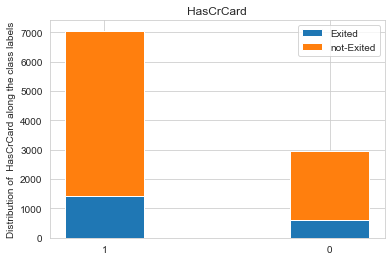

In [401]:
fig, ax = plt.subplots()

labels.sort(reverse=True)
ax.bar(labels, exited, width,label='Exited' )
ax.bar(labels, not_exited, width,bottom=exited,
       label='not-Exited')

ax.set_ylabel('Distribution of  HasCrCard along the class labels')
ax.set_title('HasCrCard')
ax.legend()

plt.show()

In [402]:
labels=list(set(df['IsActiveMember'].values))
print(labels)
exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['IsActiveMember'].iloc[i]==1]),len([i for i in range(len(df)) if df['Exited'].iloc[i]==1 and df['IsActiveMember'].iloc[i]==0])] 
not_exited=[len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['IsActiveMember'].iloc[i]==1]),len([i for i in range(len(df)) if df['Exited'].iloc[i]==0 and df['IsActiveMember'].iloc[i]==0])] 
width = 0.35
print(exited)
print(not_exited)
for i in range(len(labels)):
    labels[i]=str(labels[i])

[0, 1]
[735, 1302]
[4416, 3547]


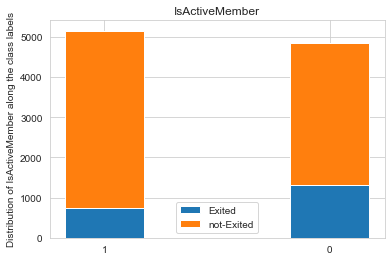

In [403]:
fig, ax = plt.subplots()

labels.sort(reverse=True)
ax.bar(labels, exited, width,label='Exited' )
ax.bar(labels, not_exited, width,bottom=exited,
       label='not-Exited')

ax.set_ylabel('Distribution of IsActiveMember along the class labels')
ax.set_title('IsActiveMember')
ax.legend()

plt.show()

<h3>Observations</h3>
1.From the numerical features Age,Balance and tenure may play key features in modelling.<br>
2.From the categorical features as we can see for every feature no of not - exited is more than no of exited which may be due to imbalance in class values.<br> 


In [404]:
y = df['Exited'].values
X = df.drop(['Exited'], axis=1)
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [405]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

<h3>Feature transformation</h3>


In [406]:

Scaler =StandardScaler()
Scaler.fit(X_train['CreditScore'].values.reshape(-1,1))

X_tr_cr=Scaler.fit_transform(X_train['CreditScore'].values.reshape(-1,1)).reshape(1,-1)

X_te_cr=Scaler.transform(X_test['CreditScore'].values.reshape(-1,1)).reshape(1,-1)

print(X_tr_cr.shape)
print(X_te_cr.shape)


(1, 8000)
(1, 2000)


In [407]:
Scaler = StandardScaler()
Scaler.fit(X_train['Age'].values.reshape(-1,1))

X_tr_age=Scaler.transform(X_train['Age'].values.reshape(-1,1)).reshape(1,-1)

X_te_age=Scaler.transform(X_test['Age'].values.reshape(-1,1)).reshape(1,-1)

print(X_tr_age.shape)
print(X_te_age.shape)

(1, 8000)
(1, 2000)


In [408]:
Scaler = StandardScaler()
Scaler.fit(X_train['Tenure'].values.reshape(-1,1))

X_tr_ten=Scaler.transform(X_train['Tenure'].values.reshape(-1,1)).reshape(1,-1) 

X_te_ten=Scaler.transform(X_test['Tenure'].values.reshape(-1,1)).reshape(1,-1)

print(X_tr_ten.shape)
print(X_te_ten.shape)

(1, 8000)
(1, 2000)


In [409]:
Scaler = StandardScaler()
Scaler.fit(X_train['Balance'].values.reshape(-1,1))

X_tr_bal=Scaler.transform(X_train['Balance'].values.reshape(-1,1)).reshape(1,-1) 

X_te_bal=Scaler.transform(X_test['Balance'].values.reshape(-1,1)).reshape(1,-1) 

print(X_tr_bal.shape)
print(X_te_bal.shape)

(1, 8000)
(1, 2000)


In [410]:
Scaler =StandardScaler()
Scaler.fit(X_train['NumOfProducts'].values.reshape(-1,1))

X_tr_pr=Scaler.transform(X_train['NumOfProducts'].values.reshape(-1,1)).reshape(1,-1)

X_te_pr=Scaler.transform(X_test['NumOfProducts'].values.reshape(-1,1)).reshape(1,-1)

print(X_tr_pr.shape)
print(X_te_pr.shape)

(1, 8000)
(1, 2000)


In [411]:
Scaler = StandardScaler()
Scaler.fit(X_train['EstimatedSalary'].values.reshape(-1,1))

X_tr_sal=Scaler.transform(X_train['EstimatedSalary'].values.reshape(-1,1)).reshape(1,-1)

X_te_sal=Scaler.transform(X_test['EstimatedSalary'].values.reshape(-1,1)).reshape(1,-1) 

print(X_tr_sal.shape)
print(X_te_sal.shape)


(1, 8000)
(1, 2000)


In [412]:
vectorizer = CountVectorizer()

vectorizer.fit(X_train['Geography'].values)

X_tr_geo=vectorizer.transform(X_train['Geography'].values)

X_te_geo=vectorizer.transform(X_test['Geography'].values)

print(vectorizer.get_feature_names())
print(X_tr_geo.shape)
print(X_te_geo.shape)


['france', 'germany', 'spain']
(8000, 3)
(2000, 3)


In [413]:
vectorizer = CountVectorizer()

vectorizer.fit(X_train['Gender'].values)

X_tr_gen=vectorizer.transform(X_train['Gender'].values)

X_te_gen=vectorizer.transform(X_test['Gender'].values)

print(vectorizer.get_feature_names())
print(X_tr_gen.shape)
print(X_te_gen.shape)

print(X_train['Gender'].values)

['female', 'male']
(8000, 2)
(2000, 2)
['Male' 'Male' 'Female' ... 'Male' 'Female' 'Female']


In [414]:
features={'feature 0':"gender_female",'feature 1':"gender_male",'feature 2':"geography_france",'feature 3':"geography_germany",
          'feature 4':"geography_spain",'feature 5':"hascrcard",'feature 6':"isactivemember",'feature 7':"creditscore",
          'feature 8':"tenure",'feature 9':"balance",'feature 10':"noofproducts",'feature 11':"age",
          'feature 12':"salary"
         }

In [415]:


X_tr_hr=np.array(X_train['HasCrCard'].values)

X_te_hr=np.array(X_test['HasCrCard'].values) 

X_tr_ac=np.array(X_train['IsActiveMember'].values)

X_te_ac=np.array(X_test['IsActiveMember'].values)

#column order -- gender,geogrpahy,hascrcard,isactivemember,creditscore,tenure,balance,noofproducts,age,salary

X_tr=hstack((X_tr_gen,X_tr_geo,np.reshape(X_tr_hr,(len(X_tr_hr),1)),np.reshape(X_tr_ac,(len(X_tr_ac),1)),
            np.transpose(X_tr_cr),np.transpose(X_tr_ten),np.transpose(X_tr_bal),np.transpose(X_tr_pr),np.transpose(X_tr_age),
            np.transpose(X_tr_sal)))

X_te=hstack((X_te_gen,X_te_geo,np.reshape(X_te_hr,(len(X_te_hr),1)),np.reshape(X_te_ac,(len(X_te_ac),1)),
            np.transpose(X_te_cr),np.transpose(X_te_ten),np.transpose(X_te_bal),np.transpose(X_te_pr),np.transpose(X_te_age),
            np.transpose(X_te_sal)))

print(np.unique(y_train,return_counts=True))
y_train_org=y_train
print(X_tr.shape,y_train.shape)
print(X_te.shape,y_test.shape)

(array([0, 1], dtype=int64), array([6370, 1630], dtype=int64))
(8000, 13) (8000,)
(2000, 13) (2000,)


<h3>Machine Learning Models</h3>

In [416]:

# This function plots the confusion matrices given test_y, predict_y.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 2,2 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    #divide each element of the confusion matrix with the sum of elements in that row
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    #divide each element of the confusion matrix with the sum of elements in that column
    
    labels = [0,1]
    
    print("-"*20, "Confusion matrix", "-"*20)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    
    # representing A in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [417]:



params = [{'n_neighbors': [1,3,5,7,9,13,15]}] 
clf=KNeighborsClassifier()
hp=GridSearchCV(clf,params,n_jobs=-1, cv=3, scoring='roc_auc')
hp.fit(X_tr,y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 13, 15]}],
             scoring='roc_auc')

In [418]:
hp.best_params_

{'n_neighbors': 15}

In [419]:
knn = KNeighborsClassifier(n_neighbors=hp.best_params_['n_neighbors'])

# Training the model:
knn.fit(X_tr, y_train)

# Predicting target values by using x_test and our model:
y_pred = knn.predict(X_te)

In [420]:


f1_score_knn=f1_score(y_test,y_pred,average='micro')
f1_score_knn

0.841

-------------------- Confusion matrix --------------------


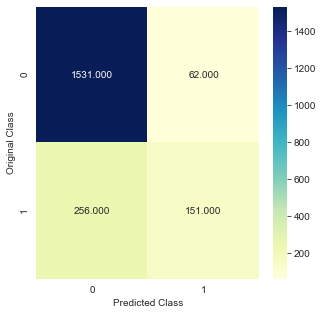

-------------------- Precision matrix (Columm Sum=1) --------------------


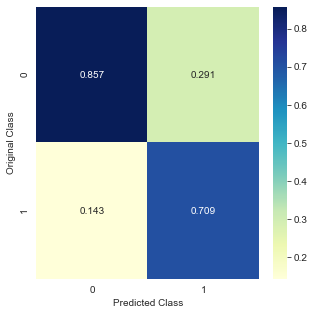

-------------------- Recall matrix (Row sum=1) --------------------


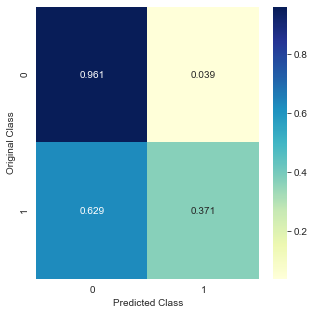

In [421]:
plot_confusion_matrix(y_test, y_pred)

In [422]:

parameters = {'C':[0.001,0.01,0.1,1,10,100]}
clf=LogisticRegression()
Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)



GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

-------------------- Confusion matrix --------------------


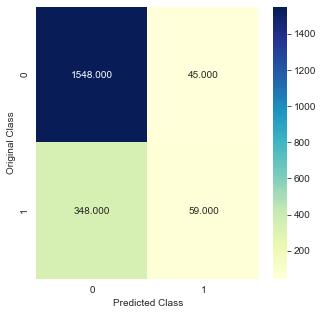

-------------------- Precision matrix (Columm Sum=1) --------------------


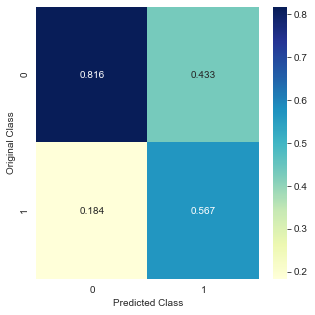

-------------------- Recall matrix (Row sum=1) --------------------


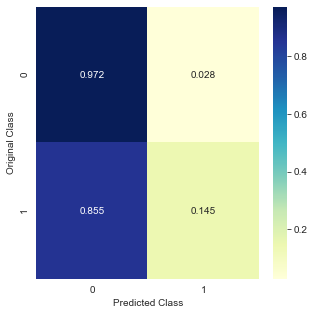

0.8035

In [423]:
clf=LogisticRegression(C=Hyper.best_params_['C'])
clf.fit(X_tr, y_train)
y_pred=clf.predict(X_te)
f1_score_lr=f1_score(y_test,y_pred,average='micro')
plot_confusion_matrix(y_test, y_pred)
f1_score_lr

In [424]:

parameters = {'max_depth':[3,5,6,7,8,9,10],'min_samples_split':[5, 10, 100, 500]}
clf=DecisionTreeClassifier()
Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 10, 100, 500]},
             scoring='roc_auc')

In [425]:
Hyper.best_params_

{'max_depth': 6, 'min_samples_split': 100}

In [426]:
classifierDT = DecisionTreeClassifier(min_samples_split=Hyper.best_params_['min_samples_split']
                                      ,max_depth=Hyper.best_params_['max_depth'])
classifierDT.fit(X_tr, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=100)

In [427]:
y_pred=classifierDT.predict(X_te)
f1_score_DT=f1_score(y_test,y_pred,average='micro')
f1_score_DT

0.855

-------------------- Confusion matrix --------------------


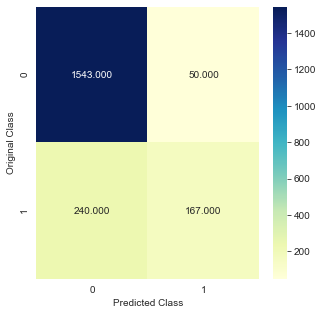

-------------------- Precision matrix (Columm Sum=1) --------------------


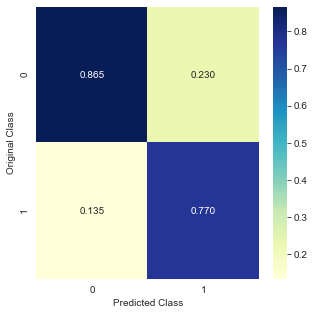

-------------------- Recall matrix (Row sum=1) --------------------


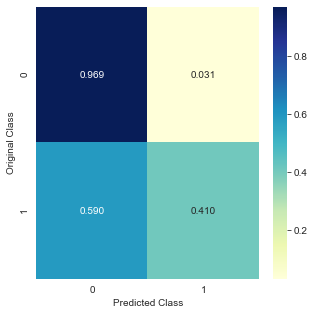

In [428]:
plot_confusion_matrix(y_test, y_pred)

In [429]:
features={'feature 0':"gender_female",'feature 1':"gender_male",'feature 2':"geography_france",'feature 3':"geography_germany",
          'feature 4':"geography_spain",'feature 5':"hascrcard",'feature 6':"isactivemember",'feature 7':"creditscore",
          'feature 8':"tenure",'feature 9':"balance",'feature 10':"noofproducts",'feature 11':"age",
          'feature 12':"salary"
         }

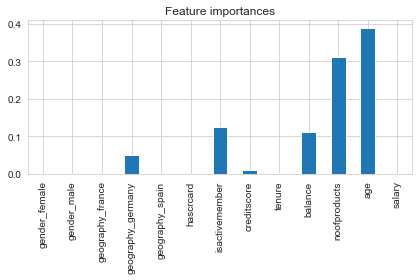

In [430]:
#refered from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [features["feature "+str(i)] for i in range(X_tr.shape[1])]
importances = classifierDT.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std(importances, axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

-------------------- Confusion matrix --------------------


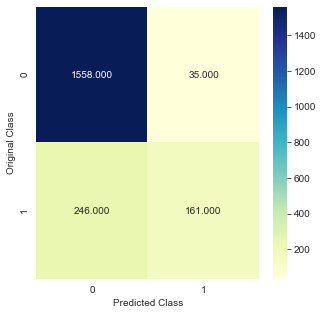

-------------------- Precision matrix (Columm Sum=1) --------------------


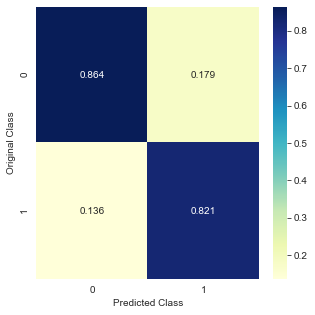

-------------------- Recall matrix (Row sum=1) --------------------


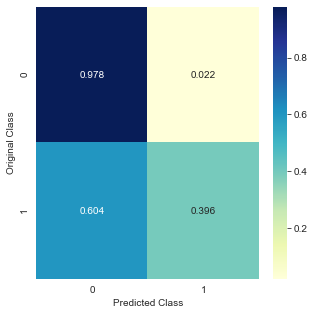

0.8595

In [431]:

parameters = {'max_depth':[3,5,6,7,8,9,10],'min_samples_split':[5, 10, 100, 500],
              'n_estimators': [50,65,80,100,115,130,150]}

clf=RandomForestClassifier()


Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)


best_params=Hyper.best_params_

rf=RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'],
                          min_samples_split=best_params['min_samples_split'])
rf.fit(X_tr, y_train)

y_pred=rf.predict(X_te)
plot_confusion_matrix(y_test, y_pred)

f1_score_rf=f1_score(y_test,y_pred,average='micro')
f1_score_rf

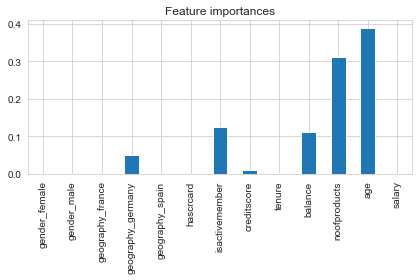

In [432]:
#refered from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [features["feature "+str(i)] for i in range(X_tr.shape[1])]
importance=rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std(importances, axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

In [433]:


parameters = {'max_depth': [3,5,6,7,8,9,10],
              'n_estimators': [50,65,80,100,115,130,150]} 

clf=xgb.XGBClassifier()

Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)






[22:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [434]:
Hyper.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [435]:
Xg=xgb.XGBClassifier(max_depth=Hyper.best_params_['max_depth'],n_estimators=Hyper.best_params_['n_estimators'])
Xg.fit(X_tr, y_train)

[22:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

-------------------- Confusion matrix --------------------


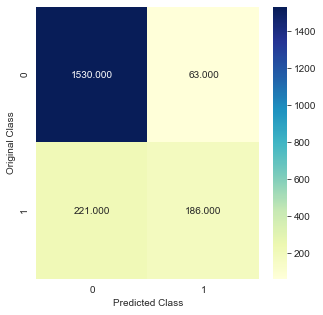

-------------------- Precision matrix (Columm Sum=1) --------------------


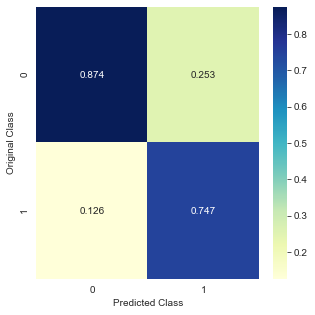

-------------------- Recall matrix (Row sum=1) --------------------


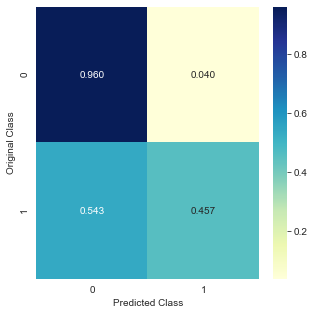

0.858

In [436]:
y_pred=Xg.predict(X_te)
plot_confusion_matrix(y_test, y_pred)
f1_score_xg=f1_score(y_test,y_pred,average='micro')
f1_score_xg

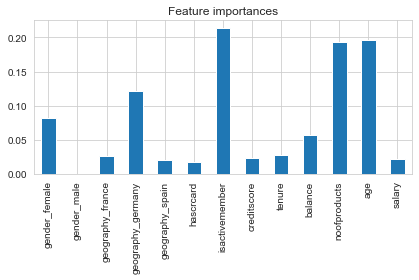

In [437]:
#refered from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [features["feature "+str(i)] for i in range(X_tr.shape[1])]
importances = Xg.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std(importances, axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

In [438]:

def response_coding(category):
    ext=dict()
    not_ext=dict()
    preprocess=[]
    for i in X_train[category].values:
        i=i.split(" ")
        s=""
        for j in i:
            s=s+j
        preprocess.append(s)
    for i in preprocess:
        ext[i]=0
        not_ext[i]=0

    for i,j in enumerate(preprocess):
        if y_train[i]==1:
            ext[j]+=1
                
        elif y_train[i]==0:
            not_ext[j]+=1
    count=Counter(list(preprocess))
    #print(count)
    #print(pos)
    
    #print(neg)
    ext_prob=dict()
    not_ext_prob=dict()
    for i in preprocess:
        ext_prob[i]=ext[i]/count[i]
        not_ext_prob[i]=not_ext[i]/count[i]
    #print(preprocess)
    return ext_prob,not_ext_prob,preprocess
    

In [439]:
ext_prob,not_ext_prob,preprocess_1=response_coding('Geography') 
train=[]
for i in preprocess_1:
    train.append([ext_prob[i],not_ext_prob[i]])
    
train=np.array(train)

X_tr_geo = train
preprocess_2=[]
for i in X_test['Geography'].values:
    i=i.split(" ")
    s=""
    for j in i:
        s=s+j
    preprocess_2.append(s)
test=[]
for i in preprocess_2:
    if i not in ext_prob and i not in not_ext_prob:
        test.append([0.5,0.5])
    else:
        test.append([ext_prob[i],not_ext_prob[i]])
    
test=np.array(test)
X_te_geo = test

print(ext_prob)
print(not_ext_prob)
print(X_tr_geo.shape)
print(X_te_geo.shape)


print("="*100)

{'Spain': 0.16551040634291378, 'France': 0.16323455549974886, 'Germany': 0.323}
{'Spain': 0.8344895936570862, 'France': 0.8367654445002511, 'Germany': 0.677}
(8000, 2)
(2000, 2)


In [440]:
ext_prob,not_ext_prob,preprocess_1=response_coding('Gender') 
train=[]
for i in preprocess_1:
    train.append([ext_prob[i],not_ext_prob[i]])
    
train=np.array(train)

X_tr_gen = train
preprocess_2=[]
for i in X_test['Gender'].values:
    i=i.split(" ")
    s=""
    for j in i:
        s=s+j
    preprocess_2.append(s)
test=[]
for i in preprocess_2:
    if i not in ext_prob and i not in not_ext_prob:
        test.append([0.5,0.5])
    else:
        test.append([ext_prob[i],not_ext_prob[i]])
    
test=np.array(test)
X_te_gen = test

print(ext_prob)
print(not_ext_prob)
print(X_tr_gen.shape)
print(X_te_gen.shape)


print("="*100)

{'Male': 0.163632173311823, 'Female': 0.25129745971046163}
{'Male': 0.836367826688177, 'Female': 0.7487025402895384}
(8000, 2)
(2000, 2)


In [441]:

features={'feature 0':"gender_1",'feature 1':"gender_0",'feature 2':"geography_1",'feature 3':"geography_0",
          'feature 4':"hascrcard",'feature 5':"isactivemember",'feature 6':"creditscore",
          'feature 7':"tenure",'feature 8':"balance",'feature 9':"noofproducts",'feature 10':"age",
          'feature 11':"salary"
         }

In [442]:


X_tr_hr=np.array(X_train['HasCrCard'].values)

X_te_hr=np.array(X_test['HasCrCard'].values) 

X_tr_ac=np.array(X_train['IsActiveMember'].values)

X_te_ac=np.array(X_test['IsActiveMember'].values)

#column order -- gender,geogrpahy,hascrcard,isactivemember,creditscore,tenure,balance,noofproducts,age,salary

X_tr=np.hstack((X_tr_gen,X_tr_geo,np.reshape(X_tr_hr,(len(X_tr_hr),1)),np.reshape(X_tr_ac,(len(X_tr_ac),1)),
            np.transpose(X_tr_cr),np.transpose(X_tr_ten),np.transpose(X_tr_bal),np.transpose(X_tr_pr),np.transpose(X_tr_age),
            np.transpose(X_tr_sal)))

X_te=np.hstack((X_te_gen,X_te_geo,np.reshape(X_te_hr,(len(X_te_hr),1)),np.reshape(X_te_ac,(len(X_te_ac),1)),
            np.transpose(X_te_cr),np.transpose(X_te_ten),np.transpose(X_te_bal),np.transpose(X_te_pr),np.transpose(X_te_age),
            np.transpose(X_te_sal)))


print(X_tr.shape,y_train.shape)
print(X_te.shape,y_test.shape)

(8000, 12) (8000,)
(2000, 12) (2000,)


{'n_neighbors': 15}
0.8404999999999999
-------------------- Confusion matrix --------------------


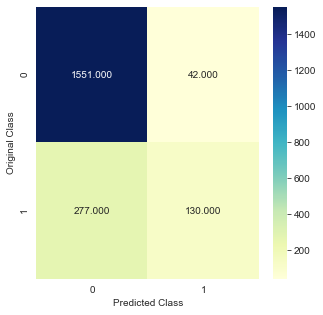

-------------------- Precision matrix (Columm Sum=1) --------------------


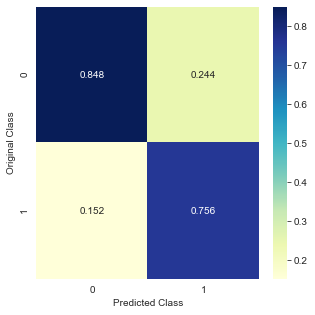

-------------------- Recall matrix (Row sum=1) --------------------


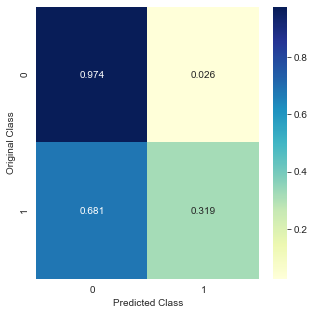

In [443]:


params = [{'n_neighbors': [1,3,5,7,9,13,15]}]
clf=KNeighborsClassifier()
hp=GridSearchCV(clf,params,n_jobs=-1, cv=3, scoring='roc_auc')
hp.fit(X_tr,y_train)

best_params=hp.best_params_

print(best_params)

knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# Training the model:
knn.fit(X_tr, y_train)

# Predicting target values by using x_test and our model:
y_pred = knn.predict(X_te)

from sklearn.metrics import f1_score
f1_score_knn_res=f1_score(y_test,y_pred,average='micro')

print(f1_score_knn_res)
plot_confusion_matrix(y_test, y_pred)

-------------------- Confusion matrix --------------------


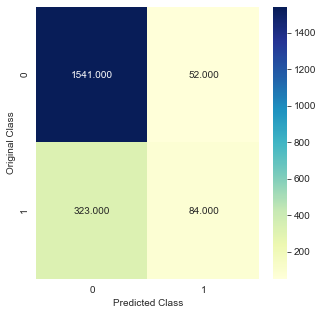

-------------------- Precision matrix (Columm Sum=1) --------------------


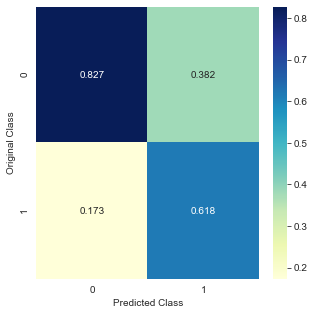

-------------------- Recall matrix (Row sum=1) --------------------


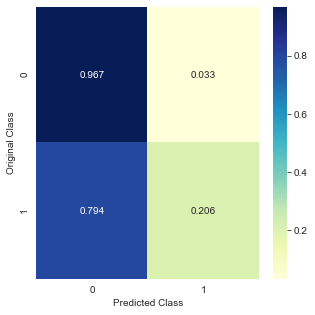

0.8125

In [444]:

parameters = {'C':[0.001,0.01,0.1,1,10,100]}
clf=LogisticRegression()
Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)

clf=LogisticRegression(C=Hyper.best_params_['C'])
clf.fit(X_tr, y_train)
y_pred=clf.predict(X_te)
f1_score_lr_res=f1_score(y_test,y_pred,average='micro')
plot_confusion_matrix(y_test, y_pred)
f1_score_lr_res


0.855
-------------------- Confusion matrix --------------------


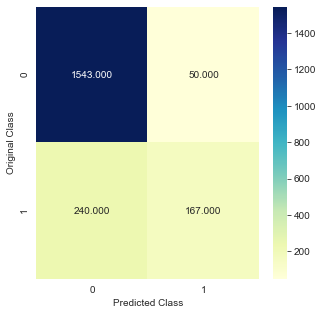

-------------------- Precision matrix (Columm Sum=1) --------------------


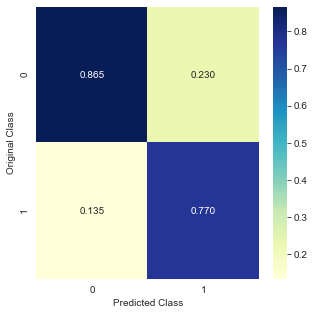

-------------------- Recall matrix (Row sum=1) --------------------


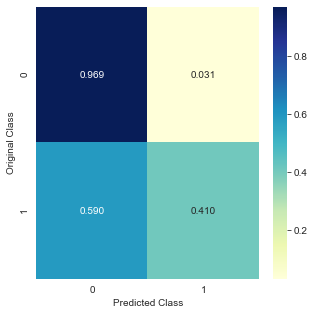

In [445]:

parameters = {'max_depth':[3,5,6,7,8,9,10],'min_samples_split':[5, 10, 100, 500]}
clf=DecisionTreeClassifier()
Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)

best_params=Hyper.best_params_

classifierDT = DecisionTreeClassifier(min_samples_split=best_params['min_samples_split'],max_depth=best_params['max_depth'])
classifierDT.fit(X_tr, y_train)

y_pred=classifierDT.predict(X_te)
f1_score_DT_res=f1_score(y_test,y_pred,average='micro')
print(f1_score_DT_res)

plot_confusion_matrix(y_test, y_pred)


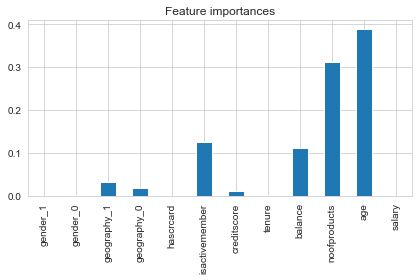

In [452]:
#refered from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [features["feature "+str(i)] for i in range(X_tr.shape[1])]
importances = classifierDT.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std(importances, axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

-------------------- Confusion matrix --------------------


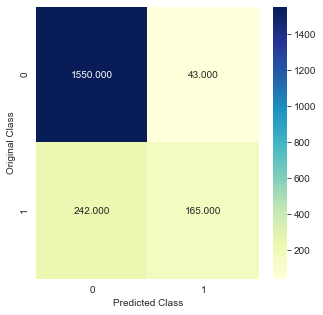

-------------------- Precision matrix (Columm Sum=1) --------------------


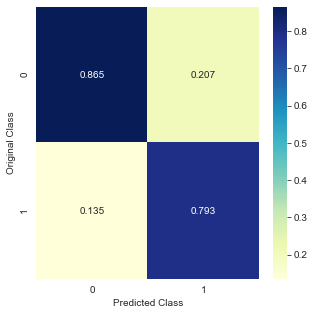

-------------------- Recall matrix (Row sum=1) --------------------


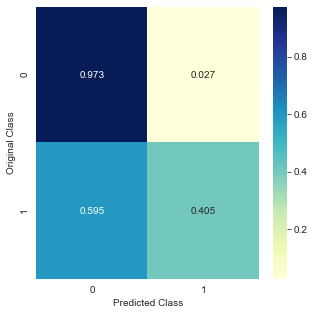

0.8575

In [447]:

parameters = {'max_depth':[3,5,6,7,8,9,10],'min_samples_split':[5, 10, 100, 500],
              'n_estimators': [50,65,80,100,115,130,150]}

clf=RandomForestClassifier()


Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)


best_params=Hyper.best_params_

rf=RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'],
                          min_samples_split=best_params['min_samples_split'])
rf.fit(X_tr, y_train)

y_pred=rf.predict(X_te)
plot_confusion_matrix(y_test, y_pred)

f1_score_rf_res=f1_score(y_test,y_pred,average='micro')
f1_score_rf_res



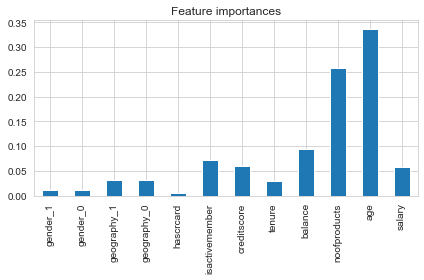

In [453]:
#refered from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [features["feature "+str(i)] for i in range(X_tr.shape[1])]
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std(importances, axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

[22:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------- Confusion matrix --------------------


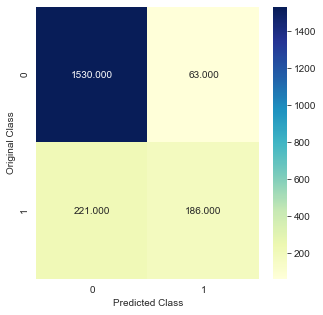

-------------------- Precision matrix (Columm Sum=1) --------------------


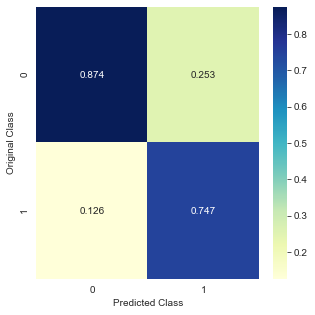

-------------------- Recall matrix (Row sum=1) --------------------


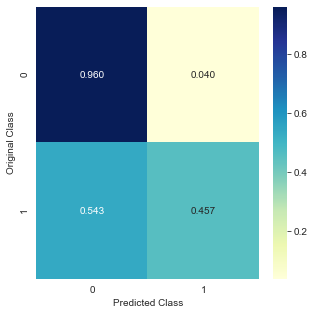

0.858

In [449]:


parameters = {'max_depth': [3,5,6,7,8,9,10],
              'n_estimators': [50,65,80,100,115,130,150]} 

clf=xgb.XGBClassifier()

Hyper=GridSearchCV(clf,parameters, cv=3, scoring='roc_auc', n_jobs=-1)
Hyper.fit(X_tr, y_train)


best_params=Hyper.best_params_

Xg=xgb.XGBClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'])
Xg.fit(X_tr, y_train)

y_pred=Xg.predict(X_te)
plot_confusion_matrix(y_test, y_pred)

f1_score_xg_res=f1_score(y_test,y_pred,average='micro')
f1_score_xg_res


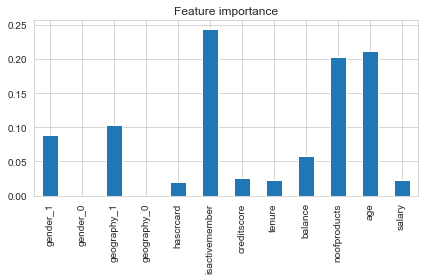

In [450]:
#refered from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [features["feature "+str(i)] for i in range(X_tr.shape[1])]
importances = Xg.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std(importances, axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importance")
fig.tight_layout()

In [451]:
from prettytable import PrettyTable

x = PrettyTable()

x.add_column("Vectorizer", [])

x.add_column("Model", [])

x.add_column("F1-score", [])

x.add_row(["one-hotEncoding","KNN",f1_score_knn])
x.add_row(["one-hotEncoding","Logistic-regression",f1_score_lr])
x.add_row(["one-hotEncoding","Decision Trees",f1_score_DT])
x.add_row(["one-hotEncoding","random forest",f1_score_rf])
x.add_row(["one-hotEncoding","XGboost-classifier",f1_score_xg])
x.add_row(["response-coding","KNN",f1_score_knn_res])
x.add_row(["response-coding","Logistic-regression",f1_score_lr_res])
x.add_row(["response-coding","Decision Trees",f1_score_DT_res])
x.add_row(["response-coding","random forest",f1_score_rf_res])
x.add_row(["response-coding","XGboost-classifier",f1_score_xg_res])


print(x)

+-----------------+---------------------+--------------------+
|    Vectorizer   |        Model        |      F1-score      |
+-----------------+---------------------+--------------------+
| one-hotEncoding |         KNN         |       0.841        |
| one-hotEncoding | Logistic-regression |       0.8035       |
| one-hotEncoding |    Decision Trees   |       0.855        |
| one-hotEncoding |    random forest    |       0.8595       |
| one-hotEncoding |  XGboost-classifier |       0.858        |
| response-coding |         KNN         | 0.8404999999999999 |
| response-coding | Logistic-regression |       0.8125       |
| response-coding |    Decision Trees   |       0.855        |
| response-coding |    random forest    |       0.8575       |
| response-coding |  XGboost-classifier |       0.858        |
+-----------------+---------------------+--------------------+


<h3>Observations</h3>
1.From the results We can infer that response-coding vectorization and Xgboost modelling gives better perfomance.<br> 
2.From feature importance also we can interpret that isactivemember,age,noofproducts used by user gives more contribution to determining the target class.<br>